In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from __future__ import print_function
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import RandomizedPCA
%matplotlib inline

In [9]:
mnist = fetch_mldata('MNIST Original')
mnist.data.shape

(70000, 784)

In [3]:
X = mnist.data
y = mnist.target
pca = RandomizedPCA()

x_pca = pca.fit_transform(X)

[43124] [ 7.]


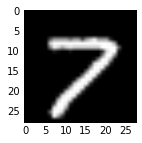

In [6]:
ind = np.random.randint(0,70000,1)
test = mnist.data[ind,:]
print(ind, mnist.target[ind])
test = test.reshape([28,28])
plt.figure(figsize=[2,2])
plt.imshow(test, cmap='gray')

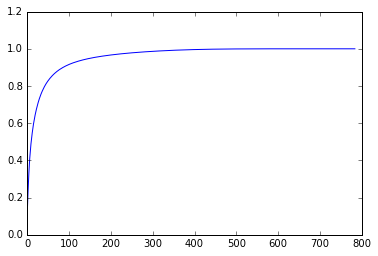

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
import timeit

X = x_pca[:,0:100]
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=1)

start = timeit.time.time()
knn.fit(X_train,y_train)
end = timeit.time.time()


end-start

0.5335676670074463

In [15]:
start = timeit.time.time()
y_pred = knn.predict(X_test)
end = timeit.time.time()

end-start

62.866482973098755

# KNN

In [10]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
import timeit

In [11]:

params = dict(n_neighbors=np.arange(1,36))

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=1)

X = x_pca[:,0:50]
y = mnist.target


rand_grid = RandomizedSearchCV(knn, params, n_iter=10,n_jobs=5,pre_dispatch='n_jobs*2', scoring='accuracy')

start = timeit.time.time()
rand_grid.fit(X,y)
end = timeit.time.time()

end-start

1094.9307448863983

In [40]:
print(rand_grid.best_estimator_)
print(rand_grid.best_score_)
test = rand_grid.grid_scores_
type(test[1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
0.974057142857


sklearn.grid_search._CVScoreTuple

# Support Vector Machines

In [4]:
from sklearn import svm
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
import timeit

In [5]:
svc = svm.SVC(C=100)
X = x_pca[:,0:50]
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

start = timeit.time.time()
svc.fit(X_train,y_train)
end = timeit.time.time()

start-end

-6397.697505712509

In [6]:
start = timeit.time.time()
y_pred = svc.predict(X_test)
end = timeit.time.time()

end-start

56.90548396110535

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.11085714285714286

# Naive Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
start = timeit.time.time()
nb.fit(np.add(X_train+0.5),y_train)
end = timeit.time.time()

y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

ValueError: invalid number of arguments

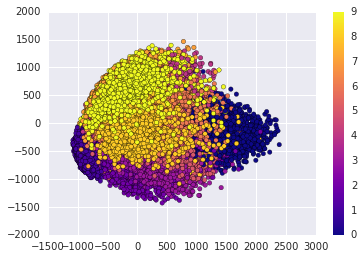

In [49]:
digit_0 = X[np.argwhere(y==2), 0:2]
digit_0 = digit_0.squeeze(axis=1)

digit_1 = X[np.argwhere(y==1), 0:2]
digit_1 = digit_1.squeeze(axis=1)

plt.scatter(X[:,0],X[:,1], c=y, cmap= plt.cm.plasma)
plt.colorbar()

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
import timeit


knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
